In [28]:
!pip install BaselineRemoval

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.signal import find_peaks
from BaselineRemoval import BaselineRemoval


In [3]:
file = "sample_sensor_data.csv"

In [5]:
data = pd.read_csv(file)

In [6]:
time_stamps = ( data.iloc[:,0]-data.iloc[0,0] )/1000

In [7]:
acc_data = data.iloc[:,1:4]
gyro_data = data.iloc[:,4:-1]

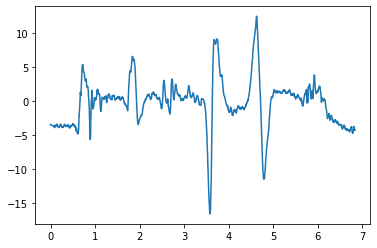

In [61]:
plt.plot(time_stamps,acc_data.iloc[:,0])

<h1>smoothing signal</h1>

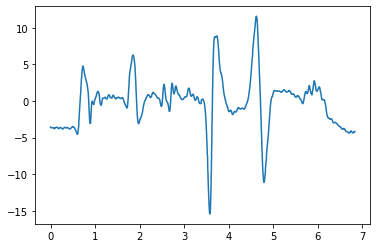

In [63]:
from scipy.signal import savgol_filter

smoothing_data = savgol_filter(acc_data.iloc[:,0], 23,1,mode='nearest')
plt.plot(time_stamps, smoothing_data)

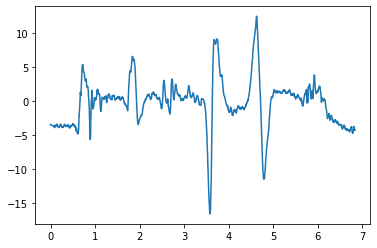

In [64]:
plt.plot(time_stamps,acc_data.iloc[:,0])

**Baseline removal**

In [46]:
from BaselineRemoval import BaselineRemoval

input_array=smoothing_data
polynomial_degree=3 #only needed for Modpoly and IModPoly algorithm

#baseObj=BaselineRemoval(input_array)
#Modpoly_output=baseObj.ModPoly(polynomial_degree)
Imodpoly_output=baseObj.IModPoly(polynomial_degree)
#Zhangfit_output=baseObj.ZhangFit()

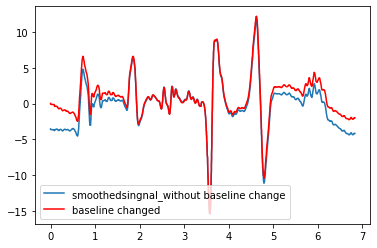

In [58]:
#lt.plot(time_stamps,savgol_filter(acc_data.iloc[:,0], 23,1,mode='nearest') )
plt.plot(time_stamps,smoothing_data,label='smoothedsingnal_without baseline change')
plt.plot(time_stamps,Imodpoly_output,color='red',label='baseline changed')
plt.legend()
plt.show()

**Peaks detection**

In [51]:
acc_data.shape

(3096, 3)

In [53]:
#peaks,_ = find_peaks(acc_data.iloc[:,0],prominence=8 )
peaks,_ = find_peaks(Imodpoly_output,prominence=8 )


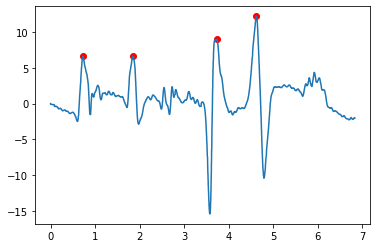

In [55]:
#plt.scatter( time_stamps.iloc[peaks],acc_data.iloc[peaks,0],color="red" )
#plt.plot(time_stamps.iloc[:],acc_data.iloc[:,0])

plt.scatter( time_stamps.iloc[peaks],Imodpoly_output[peaks],color="red" )
plt.plot(time_stamps.iloc[:],Imodpoly_output[:])



In [ ]:
num_of_steps = len(peaks)